# Qualitative Evaluation - Variational Autoencoder

In [1]:
from wgan_gp import Generator
import torch
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
%matplotlib inline

#torch.manual_seed(42)
#torch.cuda.manual_seed_all(42)
#torch.backends.cudnn.benchmark = False
#torch.backends.cudnn.deterministic = True

In [2]:
generator = Generator()

In [10]:
generator.load_state_dict(torch.load("/Users/adityajoshi/Downloads/generatordefault119.pt", map_location="cpu"))
generator.eval()

Generator(
  (decoder): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(1024, 512, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(256, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Tanh()
  )
)

In [11]:
def perturb(z, epsilon):
    z = z[0]
    perturbed_images = []
    for i in range(len(z)):
        z_copy = z.clone()
        z_copy[i] += epsilon
        perturbed_images.append(z_copy)
    perturbed_batch = torch.stack(perturbed_images)
    reconstructed_batch = generator.forward(perturbed_batch)
    return reconstructed_batch

def interpolation_1():
    z_interp = torch.randn(size=(2, 100, 1, 1))
    z_0, z_1 = z_interp[0], z_interp[1]
    results = []
    for alpha in list(np.linspace(0, 1, 11)):
        z_result = alpha * z_0 + (1 - alpha) * z_1
        results.append(z_result)
    interpolated = generator.forward(torch.stack(results))
    grid = make_grid(interpolated, nrow=11, normalize=True)
    show(grid)


def interpolation_2():
    x_reconstructed = generator.forward(torch.randn(size=(2, 100, 1, 1)))
    x_0, x_1 = x_reconstructed[0], x_reconstructed[1]
    results = []
    for alpha in list(np.linspace(0, 1, 11)):
        x_result = alpha * x_0 + (1 - alpha) * x_1
        results.append(x_result)
    grid = make_grid(torch.stack(results), nrow=11, normalize=True)
    show(grid)
    
def show(img):
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## 3.1 Visual Samples

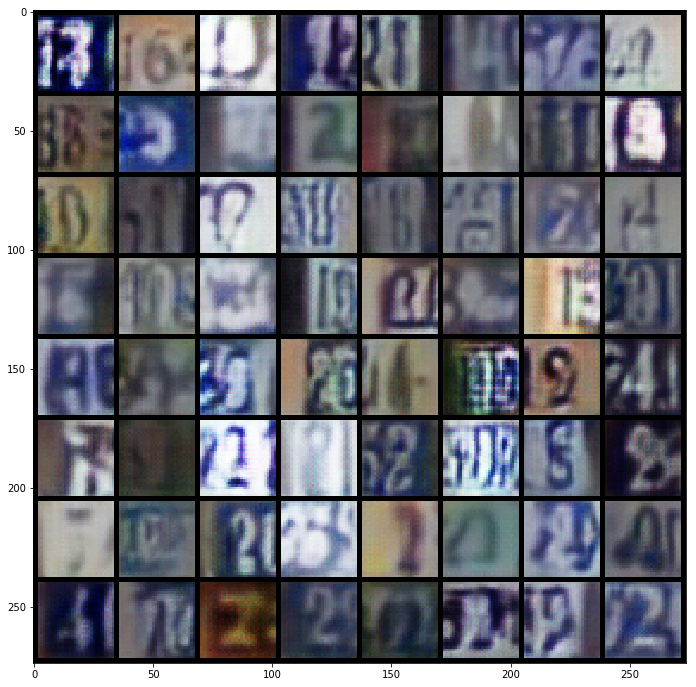

In [17]:
samples = torch.randn(size=(64, 100, 1, 1))
reconstructed_samples = generator.forward(samples)
plt.rcParams['figure.figsize'] = [20, 12]
show(make_grid(reconstructed_samples, normalize=True))


## 3.2 Perturbations in One Dimension

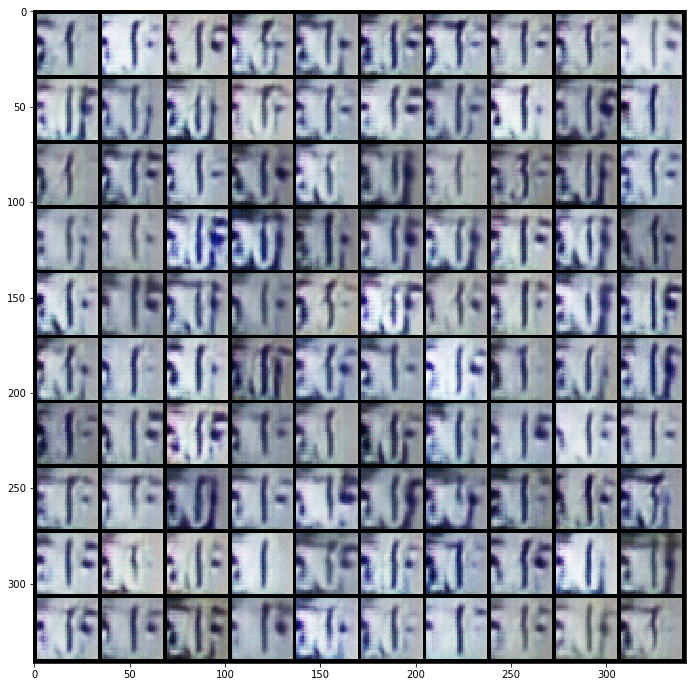

In [13]:
z = torch.randn(size=(1, 100, 1, 1))
reconstructed = generator.forward(z)
reconstructed_images = perturb(z, 4)
grid = make_grid(reconstructed_images, nrow=10, normalize=True)
plt.rcParams['figure.figsize'] = [20, 12]
show(grid)

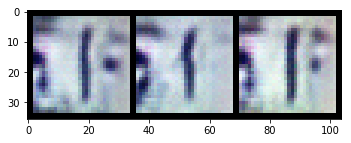

In [14]:
plt.rcParams['figure.figsize'] = [7, 2]
interesting_grid = make_grid(torch.stack([reconstructed[0], reconstructed_images[0], reconstructed_images[47]]), normalize=True)
show(interesting_grid)

## 3.3.(a) Latent Interpolation in z-space

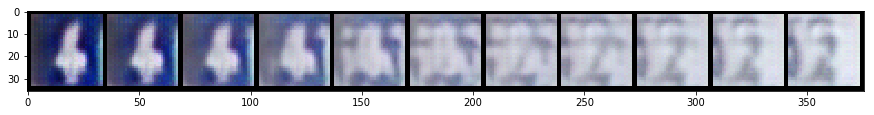

In [15]:
plt.rcParams['figure.figsize'] = [15, 6]
interpolation_1()

## 3.3.(b) Latent Interpolation in X-space

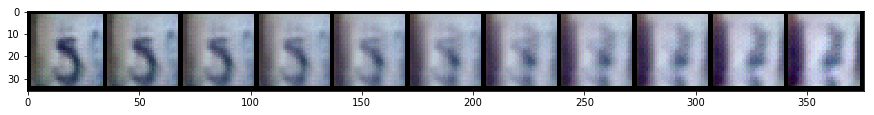

In [16]:
plt.rcParams['figure.figsize'] = [15, 6]
interpolation_2()